In [3]:
import pandas as pd
import csv

path_file = "data_table.csv"

df = pd.read_csv(path_file, encoding="cp1251")

df

,case,stage,start_time,end_time
0,77654086061,Заказ оформлен,05.10.2022 17:57,05.10.2022 17:57
1,77654086061,Поступление заказа сборщику,05.10.2022 17:57,05.10.2022 17:58
2,77654086061,Сборка заказа,05.10.2022 17:58,05.10.2022 18:22
3,77654086061,Упаковка товара,05.10.2022 18:22,05.10.2022 18:24
4,77654086061,Оплата,05.10.2022 18:24,05.10.2022 18:24
...,...,...,...,...
179025,86369405113,Передача товара курьеру,02.12.2022 9:00,02.12.2022 9:03
179026,86369405113,Доставка заказа,02.12.2022 9:03,02.12.2022 9:36
179027,86369405113,Проверка заказа,02.12.2022 9:36,02.12.2022 9:38
179028,86369405113,Отмена заказа,02.12.2022 9:38,02.12.2022 9:38


In [4]:
orders_made     = len(df[df['stage'].str.contains("Заказ оформлен")])
orders_received = len(df[df['stage'].str.contains("Заказ доставлен")])
orders_canceled = len(df[df['stage'].str.contains("Отмена заказа")])

print(f"orders made: {orders_made}, orders received: {orders_received}, orders canceled: {orders_canceled}")
print(f"Part of orders received: {orders_received/orders_made}")
print(f"Part of orders canceled: {orders_canceled/orders_made}")
print(f"Canceled + received: {orders_canceled + orders_received}, part of them: {(orders_canceled + orders_received)/orders_made}")
print(f"Canceled + received - made: {orders_canceled + orders_received - orders_made}")

orders made: 19988, orders received: 15100, orders canceled: 4913
Part of orders received: 0.7554532719631779
Part of orders canceled: 0.24579747848709227
Canceled + received: 20013, part of them: 1.0012507504502701
Canceled + received - made: 25


In [5]:
from datetime import datetime as dt

def get_orders_date_info(stage_value):
    datetime_arr = []
    for i in range(len(df['start_time'])):
        if (df['stage'][i] == stage_value):
            datetime_arr.append(dt.strptime(df['start_time'][i], "%d.%m.%Y %H:%M").strftime("%Y/%m/%d"))
    
    return datetime_arr

datetime_start_made     = get_orders_date_info("Заказ оформлен")
datetime_start_canceled = get_orders_date_info("Отмена заказа")
datetime_start_received = get_orders_date_info("Заказ доставлен")

In [6]:
from collections import Counter
from collections import OrderedDict

counted_made     = Counter(datetime_start_made)
counted_canceled = Counter(datetime_start_canceled)
counted_received = Counter(datetime_start_received)

counted_made     = OrderedDict(sorted(counted_made.items(), key=lambda t: t[0]))
counted_canceled = OrderedDict(sorted(counted_canceled.items(), key=lambda t: t[0]))
counted_received = OrderedDict(sorted(counted_received.items(), key=lambda t: t[0]))


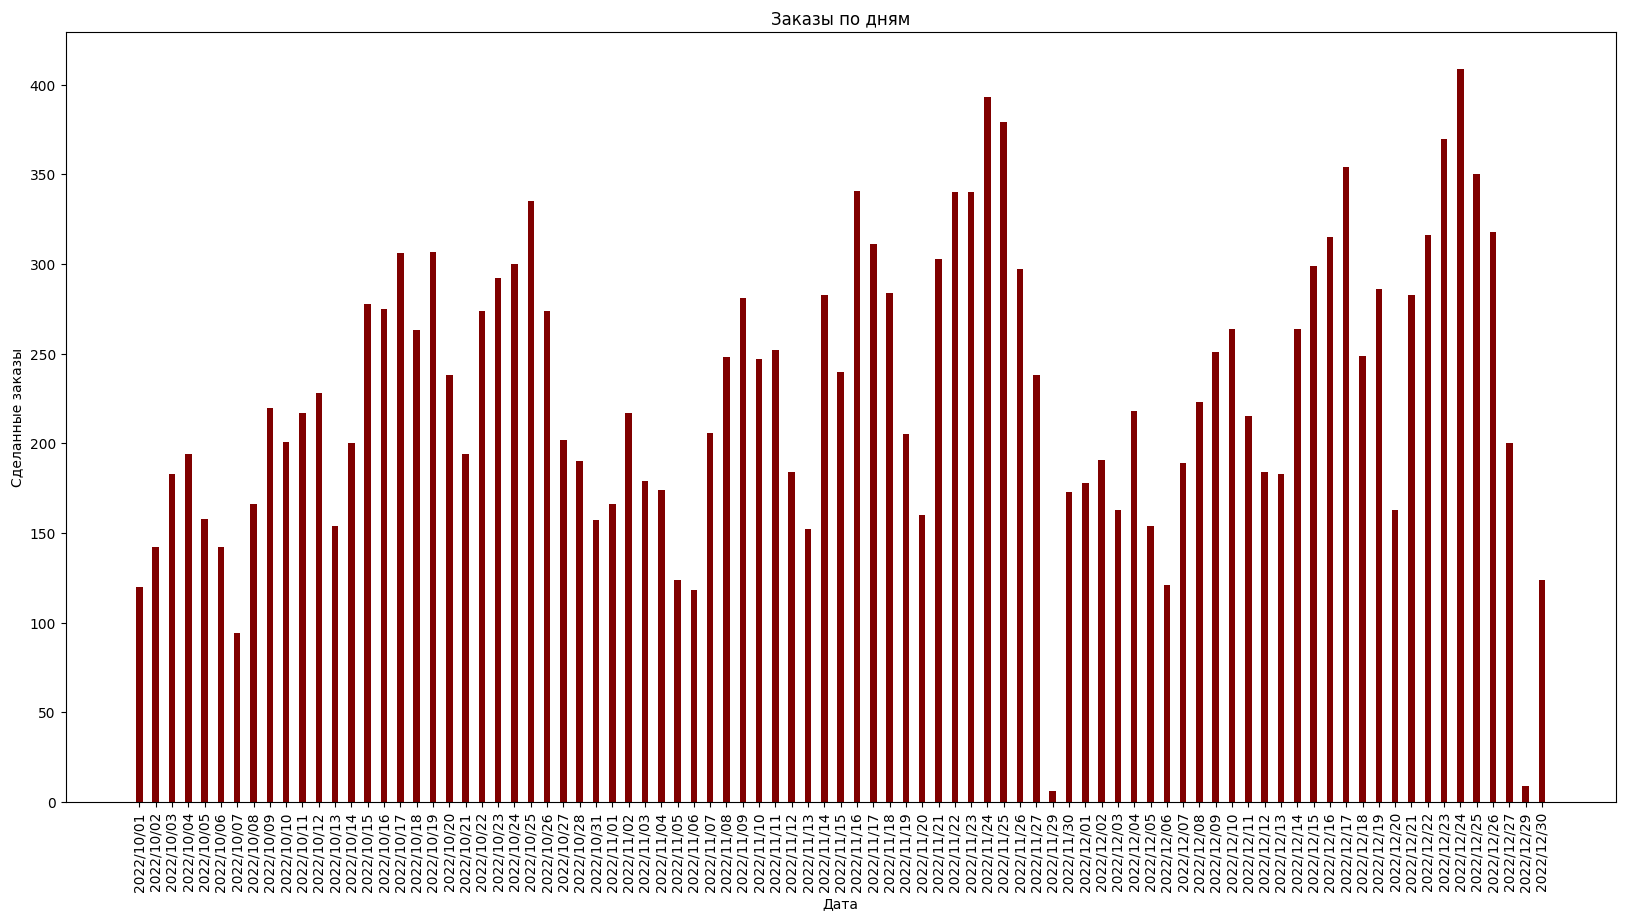

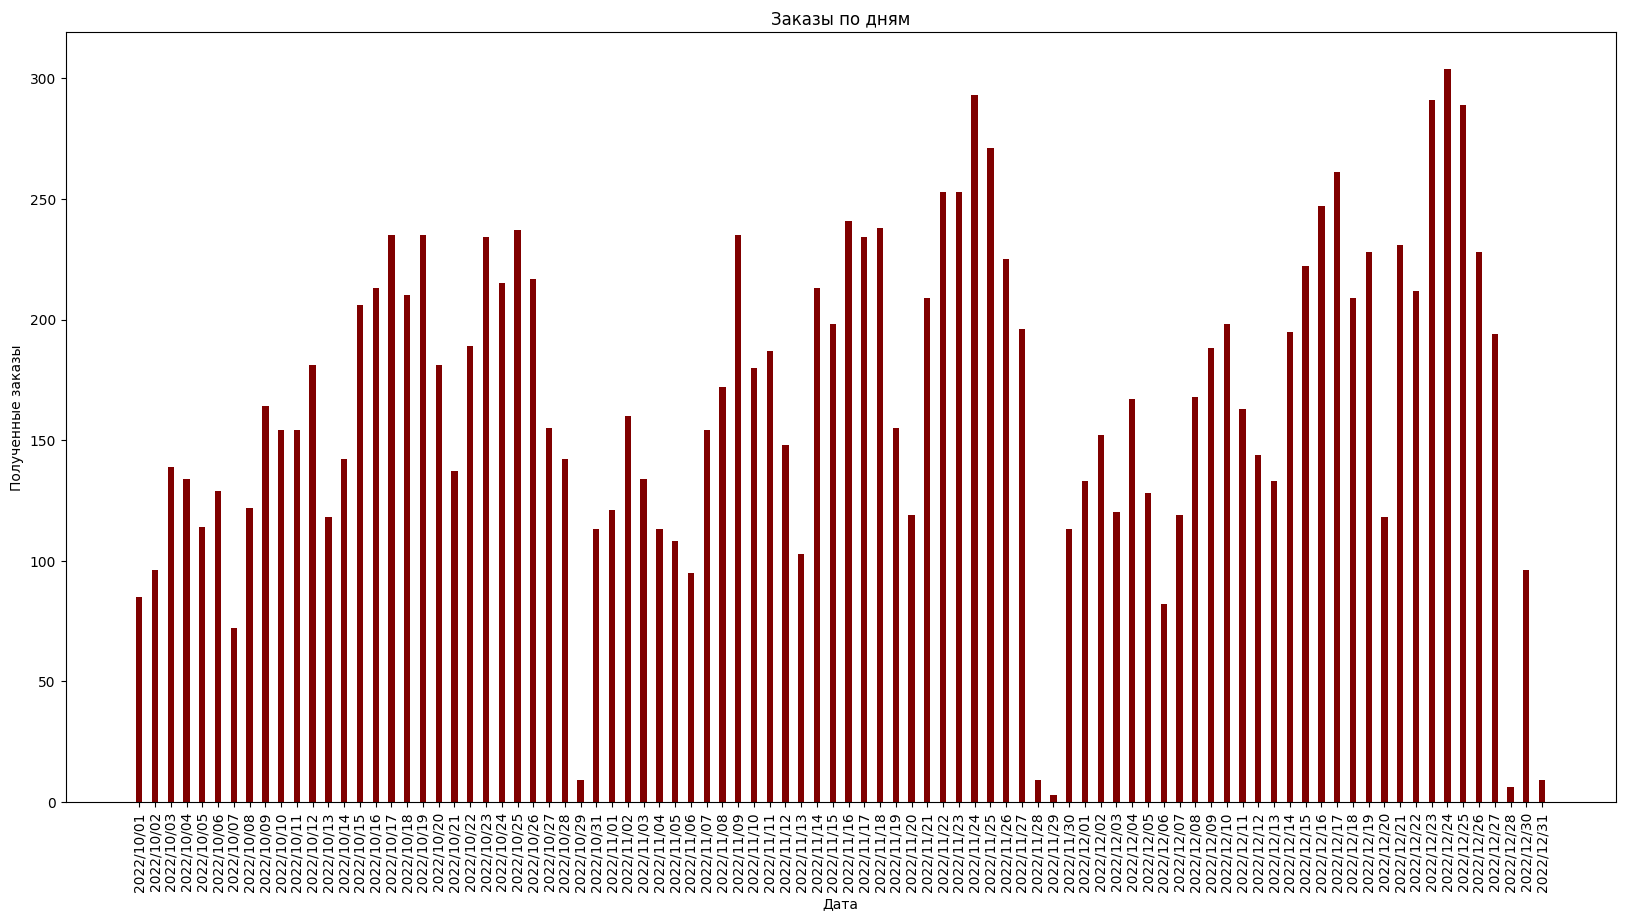

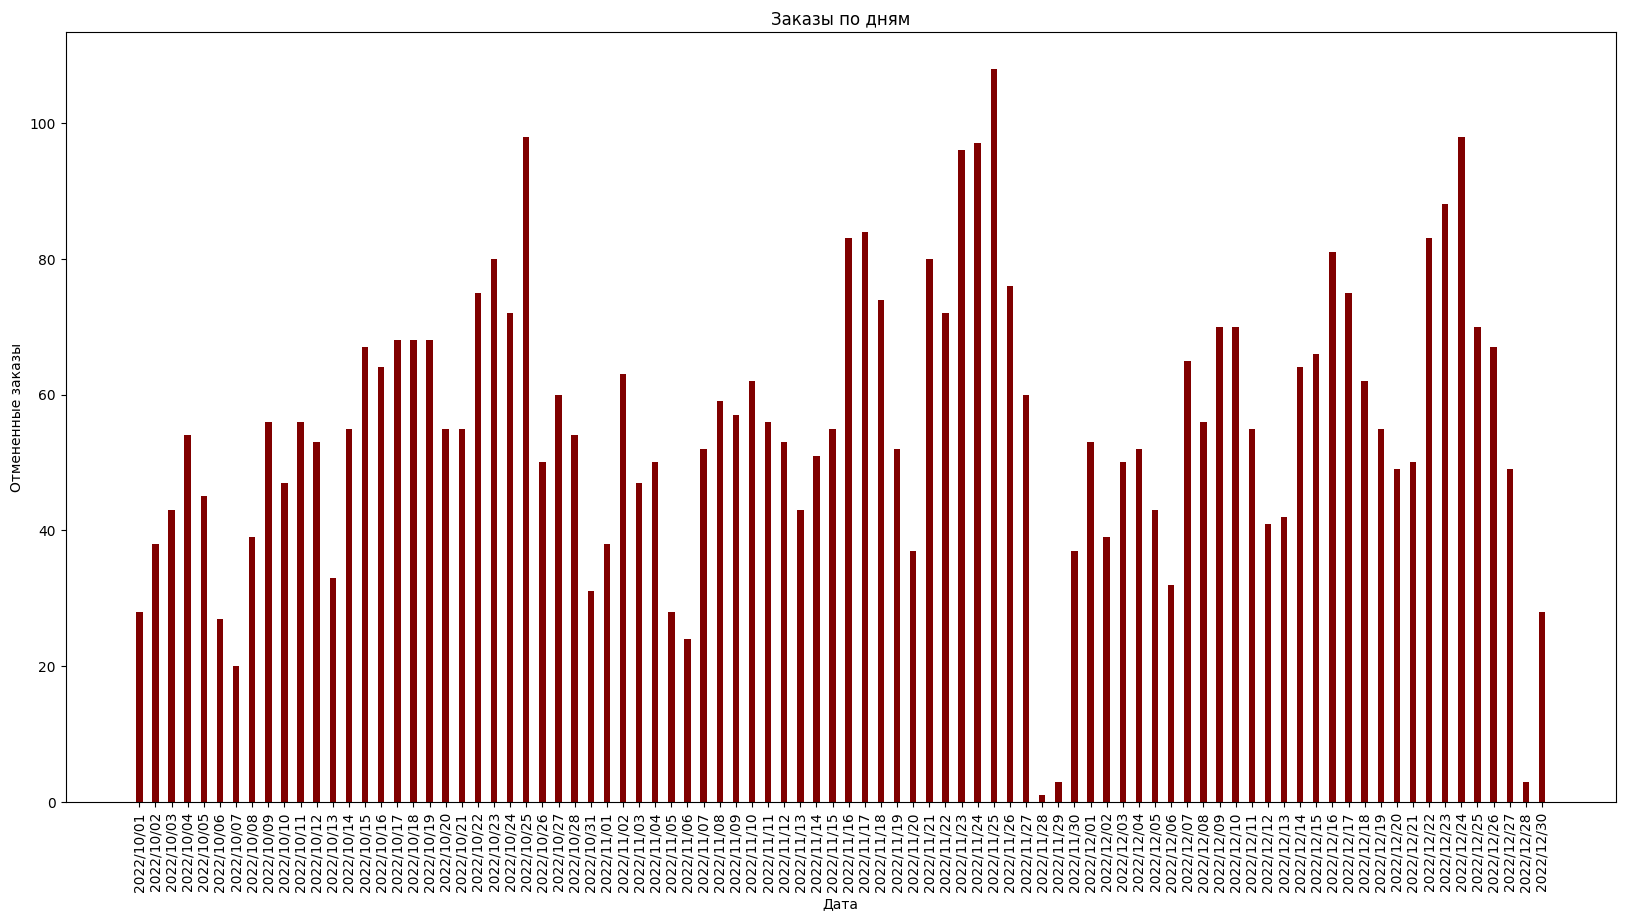

In [7]:
import numpy as np
import matplotlib.pyplot as plt 
 
def make_bar_plot(counted, y_name, x_name, title, filename):
        courses = list(counted.keys())
        values  = list(counted.values())
        
        fig = plt.figure(figsize = (20, 10))
        
        # creating the bar plot
        plt.bar(courses, values, color ='maroon', 
                width = 0.4)
        
        plt.xlabel(x_name)
        plt.ylabel(y_name)
        plt.xticks(rotation = 90)
        plt.title(title)
        plt.savefig(filename)

make_bar_plot(counted_made,     "Сделанные заказы", "Дата", "Заказы по дням", "Сделанные_заказы")
make_bar_plot(counted_received, "Полученные заказы", "Дата", "Заказы по дням", "Полученные_заказы")
make_bar_plot(counted_canceled, "Отмененные заказы", "Дата", "Заказы по дням", "Отмененные_заказы")

In [8]:
case_list = df['case'].to_list()
case_list = list(set(case_list))
print(f"Quantity of cases: {len(case_list)}")

bpmn_dict = {}

file1 = open("MyFile.txt","a")

for i in df.index:
    case_val  = df['case'][i]
    stage_val = df['stage'][i]
    if bpmn_dict.get(case_val) == None:
        bpmn_dict[case_val] = [stage_val]
    else:
        arr = bpmn_dict.pop(case_val)
        arr.append(stage_val)
        bpmn_dict[case_val] = arr

file1.write(str(bpmn_dict))
file1.close()

pattern_arrays = []
pattern_quant = {}

for value in bpmn_dict.values():
    if value in pattern_arrays:
        quant = pattern_quant.pop(str(value))
        pattern_quant[str(value)] = quant + 1
    else:
        pattern_arrays.append(value)
        pattern_quant[str(value)] = 1

print(f"Quantity of patterns: {len(pattern_arrays)}")
print(f"Dict with patterns: {pattern_quant}")

df_dict = {}
extended_pattern_arrays = []
sum = 0
for arr in pattern_arrays:
    quant = pattern_quant.get(str(arr))
    sum = sum + quant
    elem = arr
    elem.append(quant)
    extended_pattern_arrays.append(elem)

for i in range(len(extended_pattern_arrays)):
    df_dict['pattern' + str(i)] = extended_pattern_arrays[i]

pattern_df = pd.DataFrame.from_dict(df_dict, orient='index')
pattern_df.transpose()
name = 'pattern_arr.xlsx'
pattern_df.to_excel(name)
print("Check sum of cases: {sum}")

Quantity of cases: 19988
Quantity of patterns: 83
Dict with patterns: {"['Заказ оформлен', 'Поступление заказа сборщику', 'Сборка заказа', 'Упаковка товара', 'Оплата', 'Оплата', 'Оплата', 'Отмена заказа']": 3, "['Заказ оформлен', 'Поступление заказа сборщику', 'Сборка заказа', 'Упаковка товара', 'Оплата', 'Оплата', 'Оплата', 'Передача товара курьеру', 'Доставка заказа', 'Отмена заказа']": 8, "['Заказ оформлен', 'Поступление заказа сборщику', 'Сборка заказа', 'Упаковка товара', 'Оплата', 'Оплата', 'Оплата', 'Передача товара курьеру', 'Доставка заказа', 'Проверка заказа', 'Отмена заказа']": 1, "['Заказ оформлен', 'Поступление заказа сборщику', 'Сборка заказа', 'Упаковка товара', 'Оплата', 'Оплата', 'Оплата', 'Передача товара курьеру', 'Доставка заказа', 'Проверка заказа', 'Заказ доставлен']": 54, "['Заказ оформлен', 'Поступление заказа сборщику', 'Сборка заказа', 'Упаковка товара', 'Оплата', 'Оплата', 'Отмена заказа']": 52, "['Заказ оформлен', 'Поступление заказа сборщику', 'Сборка заказ

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('activity_metric.xlsx')


In [2]:
df

,Unnamed: 0,count,unique_ids_num,aver_count_in_trace,loop_percent,throughput,total_duration,mean_duration,median_duration,max_duration,min_duration,variance_duration,std_duration
0,Сборка заказа,22806,19781,1.152925,13.264053,0.042056,542280,23.777953,24,25,23,10.653920,0.421385
1,Поступление заказа сборщику,20941,19781,1.058642,5.539373,0.455239,46000,2.196648,1,35,0,1887.503571,5.608778
2,Оплата,20248,18876,1.072685,6.775978,2.384362,8492,0.419399,0,1,0,14.610213,0.493461
3,Упаковка товара,20047,18876,1.062036,5.841273,0.497025,40334,2.011972,2,3,1,6.294588,0.323898
4,Заказ оформлен,19988,19988,1.000000,0.000000,11.241845,1778,0.088953,0,1,0,4.862440,0.284676
5,Передача товара курьеру,17870,17870,1.000000,0.000000,0.149607,119446,6.684163,4,41,1,4947.738394,9.080876
6,Доставка заказа,17870,17870,1.000000,0.000000,0.030692,582245,32.582261,33,35,31,25.949334,0.657639
7,Проверка заказа,15557,15557,1.000000,0.000000,0.608147,25581,1.644340,2,3,1,13.881086,0.480990
8,Заказ доставлен,15100,15100,1.000000,0.000000,12.041467,1254,0.083046,0,1,0,4.568980,0.275952
9,Отмена заказа,4913,4913,1.000000,0.000000,12.533163,392,0.079788,0,1,0,4.405328,0.270965


In [9]:
df = df.sort_values(by='mean_duration', ascending=False)

In [10]:
df

,Unnamed: 0,count,unique_ids_num,aver_count_in_trace,loop_percent,throughput,total_duration,mean_duration,median_duration,max_duration,min_duration,variance_duration,std_duration
6,Доставка заказа,17870,17870,1.000000,0.000000,0.030692,582245,32.582261,33,35,31,25.949334,0.657639
0,Сборка заказа,22806,19781,1.152925,13.264053,0.042056,542280,23.777953,24,25,23,10.653920,0.421385
5,Передача товара курьеру,17870,17870,1.000000,0.000000,0.149607,119446,6.684163,4,41,1,4947.738394,9.080876
1,Поступление заказа сборщику,20941,19781,1.058642,5.539373,0.455239,46000,2.196648,1,35,0,1887.503571,5.608778
10,Звонок клиенту,3690,2685,1.374302,27.235772,0.459012,8039,2.178591,2,11,0,206.070060,1.853241
3,Упаковка товара,20047,18876,1.062036,5.841273,0.497025,40334,2.011972,2,3,1,6.294588,0.323898
7,Проверка заказа,15557,15557,1.000000,0.000000,0.608147,25581,1.644340,2,3,1,13.881086,0.480990
2,Оплата,20248,18876,1.072685,6.775978,2.384362,8492,0.419399,0,1,0,14.610213,0.493461
4,Заказ оформлен,19988,19988,1.000000,0.000000,11.241845,1778,0.088953,0,1,0,4.862440,0.284676
8,Заказ доставлен,15100,15100,1.000000,0.000000,12.041467,1254,0.083046,0,1,0,4.568980,0.275952


In [11]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Длительность в минутах')

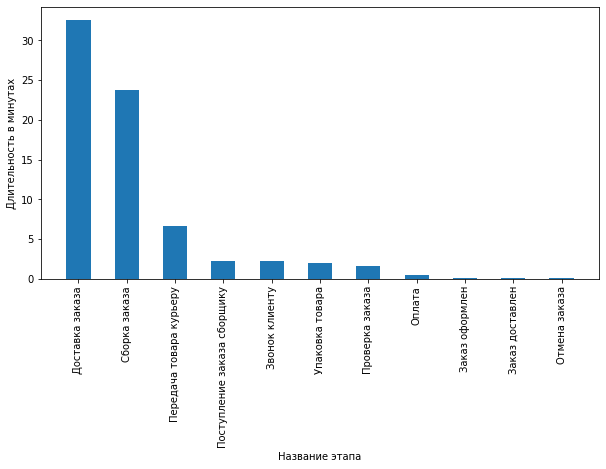

In [16]:
fig,ax = plt.subplots(figsize= (10,5))
ax.bar(df['Unnamed: 0'], df['mean_duration'], width=0.5)
plt.xticks(rotation=90)

plt.xlabel('Название этапа')
plt.ylabel('Длительность в минутах')